## Intro

This assignment applies principles of unsupervised machine learning by fitting data to a model and using clustering algorithms to place data into groups. A final visualization summarizes the findings.

In [38]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Data loading
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [7]:
# Remove the "MYOPIC" column from the dataset, as it would normally constitute our target column
# if this were supervised learning
df.drop('MYOPIC', axis=1)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [9]:
# check to see the datatypes of each of the columns
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [19]:
# Standardize your dataset so that columns that contain larger values do not influence the 
# outcome more than columns with smaller values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(df[['AGE', 'SPHEQ', 'AL', 'ACD','LT','VCD','SPORTHR',
                                                'READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR']])

In [20]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [25]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)

# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

C:\Users\willi\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [26]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [31]:
# Prepare to plot the dataset

# Transform TSNE data to a DataFrame
df_tsne = pd.DataFrame(
    data=tsne_features,
    columns=["x", "y"],
)
df_tsne.head()

,x,y
0,-8.475666,24.418665
1,13.713702,11.150225
2,-13.179319,3.580364
3,-8.705337,21.486301
4,18.551191,3.105124


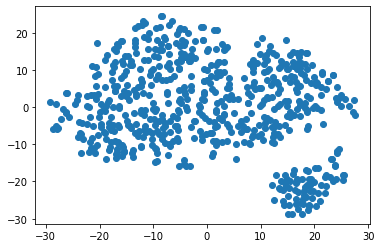

In [37]:
# Visualize the clusters
plt.scatter(df_tsne['x'], df_tsne['y'])
plt.show()

### ^There <i>do</i> appear to be distinct clusters above ^

### Finding the best value for _k_ using the Elbow Curve

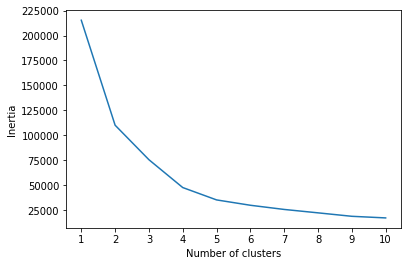

In [39]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Based on the above plot, the elbow of the plot appears near k = 3 or k = 5.

## Recommendation: Based on the data, it does not appear that the patients can be clustered in any meaningful way. My recommendation is to gather additional data, as there my have been insufficient data to group into clusters. Additonal data may yield more discernable patterns. 